In [170]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from streamlit import columns

In [171]:
df_pop = pd.read_csv('data/covid_county_population_usafacts.csv')
df_deaths = pd.read_csv('data/covid_deaths_usafacts.csv')
df_confirmed = pd.read_csv('data/covid_confirmed_usafacts.csv')

df_pop.info()
df_deaths.info()
df_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   countyFIPS   3195 non-null   int64 
 1   County Name  3195 non-null   object
 2   State        3195 non-null   object
 3   population   3195 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 100.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193 entries, 0 to 3192
Columns: 1269 entries, countyFIPS to 2023-07-23
dtypes: int64(1267), object(2)
memory usage: 30.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193 entries, 0 to 3192
Columns: 1269 entries, countyFIPS to 2023-07-23
dtypes: int64(1267), object(2)
memory usage: 30.9+ MB


In [172]:
df_deaths[df_deaths['State']=='CA']

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
190,0,Statewide Unallocated,CA,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
191,6001,Alameda County,CA,6,0,0,0,0,0,0,...,2172,2172,2172,2172,2172,2172,2172,2172,2172,2172
192,6003,Alpine County,CA,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
193,6005,Amador County,CA,6,0,0,0,0,0,0,...,100,100,100,100,100,100,100,100,100,100
194,6007,Butte County,CA,6,0,0,0,0,0,0,...,503,503,503,503,503,503,503,503,503,503
195,6009,Calaveras County,CA,6,0,0,0,0,0,0,...,144,144,144,144,144,144,144,144,144,144
196,6011,Colusa County,CA,6,0,0,0,0,0,0,...,24,24,24,24,24,24,24,24,24,24
197,6013,Contra Costa County,CA,6,0,0,0,0,0,0,...,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604
198,6015,Del Norte County,CA,6,0,0,0,0,0,0,...,62,62,62,62,62,62,62,62,62,62
199,6017,El Dorado County,CA,6,0,0,0,0,0,0,...,248,248,248,248,248,248,248,248,248,248


In [173]:
def trim_dates(df): 
    return df.drop(df.loc[:,:'2020-05-24'], axis=1).drop(df.loc[:,'2021-01-04':], axis=1)
series = trim_dates(df_deaths[df_deaths['State']=='CA']).sum()

In [174]:
sr_mean = np.round(series.rolling(window=7).mean())
sr_mean.drop(sr_mean.index[0:7], inplace=True)
sr_median = series.rolling(window=7).median()
sr_median.drop(sr_median.index[0:7], inplace=True)
def get_mode(window):
    val_count = window.value_counts()
    mode = val_count.index[val_count == val_count.max()]
    return np.round(stat.fmean(mode.tolist())) if len(mode) > 0 else mode[0]
sr_mode = series.rolling(window=7).apply(get_mode)
sr_mode.drop(sr_mode.index[0:7], inplace=True)

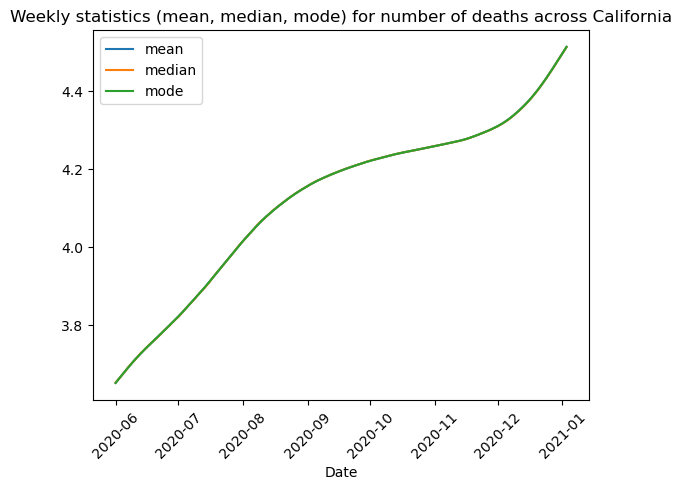

In [175]:
def add_to_plot(sr, name):
    x = sr.index.values
    x = np.asarray(x, dtype='datetime64[s]')
    y = np.log10(sr.values)
    plt.plot(x, y, label = name)
add_to_plot(sr_mean, 'mean')
add_to_plot(sr_median, 'median')
add_to_plot(sr_mode, 'mode')
plt.title("Weekly statistics (mean, median, mode) for number of deaths across California")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("")
plt.legend()
plt.show()

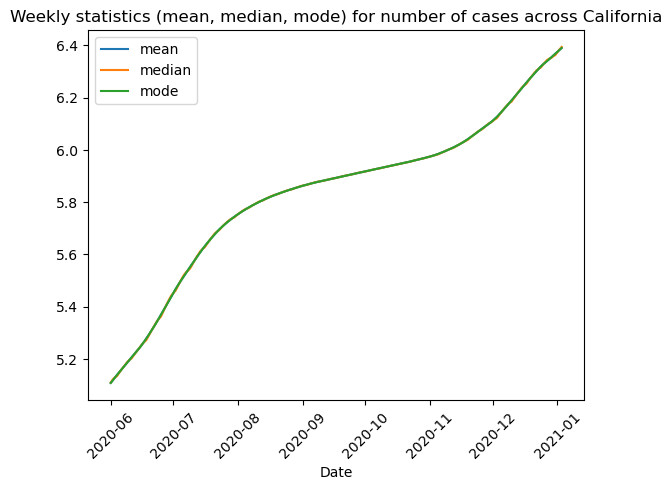

In [176]:
series = trim_dates(df_confirmed[df_confirmed['State']=='CA']).sum()
sr_mean = np.round(series.rolling(window=7).mean())
sr_mean.drop(sr_mean.index[0:7], inplace=True)
sr_median = series.rolling(window=7).median()
sr_median.drop(sr_median.index[0:7], inplace=True)
def get_mode(window):
    val_count = window.value_counts()
    mode = val_count.index[val_count == val_count.max()]
    return np.round(stat.fmean(mode.tolist())) if len(mode) > 0 else mode[0]
sr_mode = series.rolling(window=7).apply(get_mode)
sr_mode.drop(sr_mode.index[0:7], inplace=True)
def add_to_plot(sr, name):
    x = sr.index.values
    x = np.asarray(x, dtype='datetime64[s]')
    y = np.log10(sr.values)
    plt.plot(x, y, label = name)
add_to_plot(sr_mean, 'mean')
add_to_plot(sr_median, 'median')
add_to_plot(sr_mode, 'mode')
plt.title("Weekly statistics (mean, median, mode) for number of cases across California")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("")
plt.legend()
plt.show()

In [177]:
def get_pop(state):
    return df_pop[df_pop['State']==state].iloc[:,3].sum()

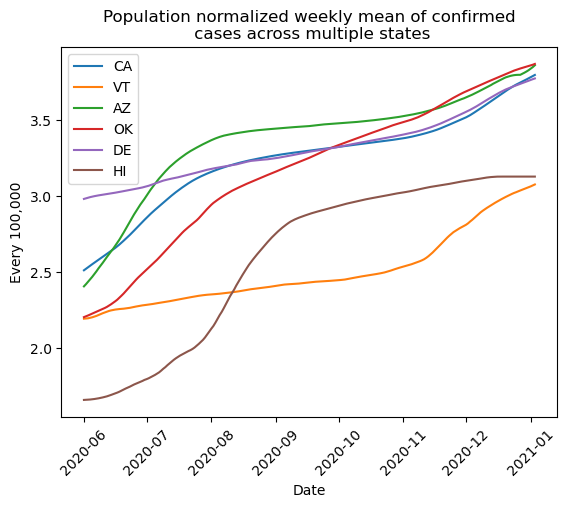

In [178]:
def add_state_to_plot(*states):
    for state in states:
        sr = trim_dates(df_confirmed[df_confirmed['State']==state]).sum()
        sr_mean = np.round(sr.rolling(window=7).mean())
        sr_mean.drop(sr_mean.index[0:7], inplace=True)
        x = sr_mean.index.values
        x = np.asarray(x, dtype='datetime64[s]')
        y = np.log10(sr_mean.values / get_pop(state) * 100000)
        plt.plot(x, y, label = state)
add_state_to_plot('CA','VT','AZ','OK','DE','HI')
plt.title("Population normalized weekly mean of confirmed\n cases across multiple states")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Every 100,000")
plt.legend()
plt.show()

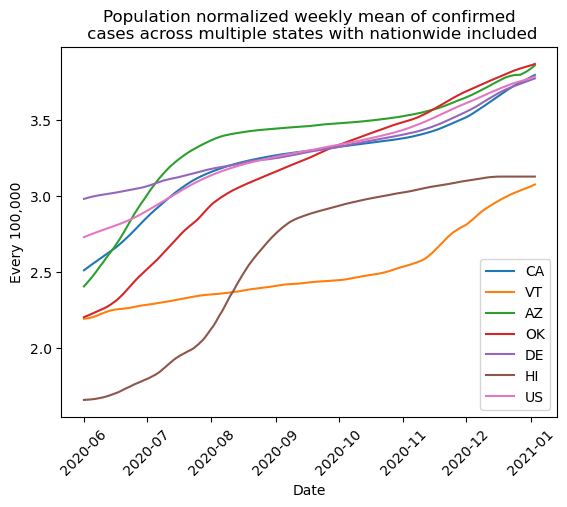

In [179]:
add_state_to_plot('CA','VT','AZ','OK','DE','HI')
df_us = pd.read_csv('data/us_confirmed_mean.csv')
x = df_us.iloc[:, 0].values
x = np.asarray(x, dtype='datetime64[s]')
y = np.log10(df_us.iloc[:, 1].values / df_pop.iloc[:,3].sum() * 100000)
plt.plot(x, y, label = "US")
plt.title("Population normalized weekly mean of confirmed\n cases across multiple states with nationwide included")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Every 100,000")
plt.legend()
plt.show()

From the graph we can observe that DE, AZ, and CA mostly followed the nationwide trend of population normalized confirmed cases. The delay in cases gain in AZ, OK, and HI can be attributed to their geographical remoteness, especially to HI. VT being particularly resistant to cases rising can be partially attributed to its remoteness and population sparsity. 

In [180]:
df_ca_pop = df_pop[df_pop['State'] == 'CA'].drop([192]).reset_index(drop=True)
df_ca_pop

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,CA,0
1,6001,Alameda County,CA,1671329
2,6003,Alpine County,CA,1129
3,6005,Amador County,CA,39752
4,6007,Butte County,CA,219186
5,6009,Calaveras County,CA,45905
6,6011,Colusa County,CA,21547
7,6013,Contra Costa County,CA,1153526
8,6015,Del Norte County,CA,27812
9,6017,El Dorado County,CA,192843


In [181]:
df_ca = df_confirmed[df_confirmed['State'] == 'CA']
df_ca = df_ca[['County Name', '2021-01-03']].reset_index(drop=True)
df_ca_pop = df_pop[df_pop['State'] == 'CA'].drop([192]).reset_index(drop=True)
df_norm_counties = pd.DataFrame({'County Name': df_ca['County Name'], 'Normalized': df_ca['2021-01-03']/df_pop['population']}, index = df_ca.index)
df_norm_counties.sort_values('Normalized', ascending=False, inplace=True)
fig = go.Figure(
    data=[go.Bar(y=df_norm_counties['Normalized'].iloc[1:6],x=df_norm_counties['County Name'].iloc[1:6])],
    layout_title_text="Population normalized of top 5 counties as of 2021-01-03"
)
fig.show()

In [182]:
df_ca = df_deaths[df_deaths['State'] == 'CA']
df_ca = df_ca[['County Name', '2021-01-03']].reset_index(drop=True)
df_ca_pop = df_pop[df_pop['State'] == 'CA'].drop([192]).reset_index(drop=True)
df_norm_counties = pd.DataFrame({'County Name': df_ca['County Name'], 'Normalized': df_ca['2021-01-03']/df_pop['population']}, index = df_ca.index)
df_norm_counties.sort_values('Normalized', ascending=False, inplace=True)
fig = go.Figure(
    data=[go.Bar(y=df_norm_counties['Normalized'].iloc[0:5],x=df_norm_counties['County Name'].iloc[0:5])],
    layout_title_text="Population normalized deaths of top 5 counties as of 2021-01-03"
)
fig.show()

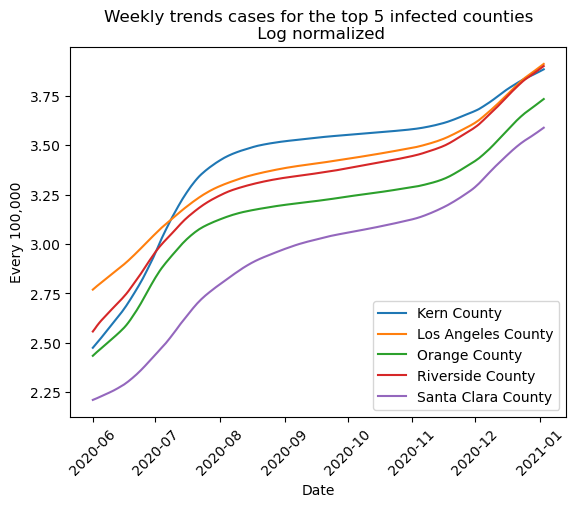

In [183]:
df_confirmed = pd.read_csv('data/covid_confirmed_usafacts.csv')

def get_pop_county(county_name):
    return df_pop[df_pop['County Name']==county_name].iloc[:,3].values[0]

def add_county_to_plot(*counties):
    for county in counties:
        county_name = df_pop[df_pop['countyFIPS']==county].iloc[0,1]
        sr = trim_dates(df_confirmed.loc[df_confirmed['countyFIPS']==county,:]).sum()
        sr_mean = np.round(sr.rolling(window=7).mean())
        sr_mean.drop(sr_mean.index[0:7], inplace=True)
        x = sr_mean.index.values
        x = np.asarray(x, dtype='datetime64[s]')
        y = np.log10(sr_mean.values / get_pop_county(county_name) * 100000)
        plt.plot(x, y, label = county_name)
add_county_to_plot(6029,6037,6059,6065,6085)
plt.title("Weekly trends cases for the top 5 infected counties\n Log normalized")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Every 100,000")
plt.legend()
plt.show()

Had to use countyFIPS here. pandas refuse to give me any return if I search with county name directly. 

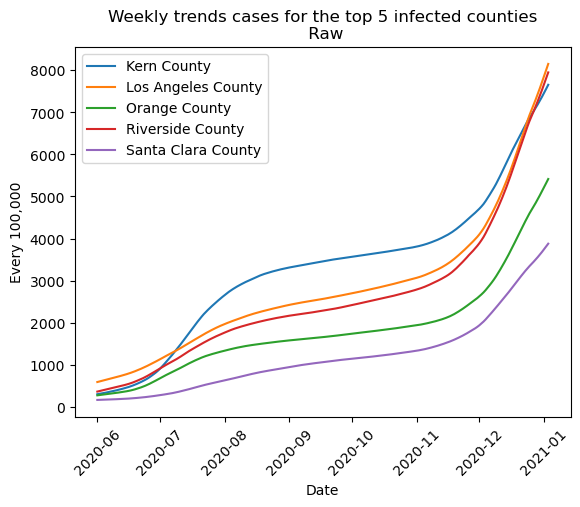

In [184]:
df_confirmed = pd.read_csv('data/covid_confirmed_usafacts.csv')

def get_pop_county(county_name):
    return df_pop[df_pop['County Name']==county_name].iloc[:,3].values[0]

def add_county_to_plot(*counties):
    for county in counties:
        county_name = df_pop[df_pop['countyFIPS']==county].iloc[0,1]
        sr = trim_dates(df_confirmed.loc[df_confirmed['countyFIPS']==county,:]).sum()
        sr_mean = np.round(sr.rolling(window=7).mean())
        sr_mean.drop(sr_mean.index[0:7], inplace=True)
        x = sr_mean.index.values
        x = np.asarray(x, dtype='datetime64[s]')
        y = sr_mean.values / get_pop_county(county_name) * 100000
        plt.plot(x, y, label = county_name)
add_county_to_plot(6029,6037,6059,6065,6085)
plt.title("Weekly trends cases for the top 5 infected counties\n Raw")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Every 100,000")
plt.legend()
plt.show()

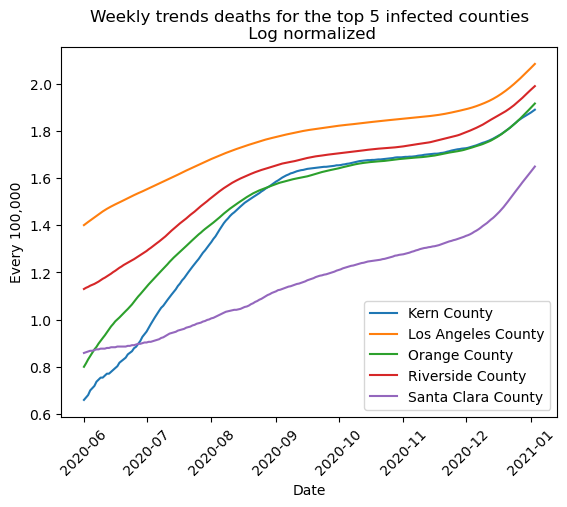

In [185]:
df_deaths = pd.read_csv('data/covid_deaths_usafacts.csv')

def get_pop_county(county_name):
    return df_pop[df_pop['County Name']==county_name].iloc[:,3].values[0]

def add_county_to_plot(*counties):
    for county in counties:
        county_name = df_pop[df_pop['countyFIPS']==county].iloc[0,1]
        sr = trim_dates(df_deaths.loc[df_deaths['countyFIPS']==county,:]).sum()
        sr_mean = np.round(sr.rolling(window=7).mean())
        sr_mean.drop(sr_mean.index[0:7], inplace=True)
        x = sr_mean.index.values
        x = np.asarray(x, dtype='datetime64[s]')
        y = np.log10(sr_mean.values / get_pop_county(county_name) * 100000)
        plt.plot(x, y, label = county_name)
add_county_to_plot(6029,6037,6059,6065,6085)
plt.title("Weekly trends deaths for the top 5 infected counties\n Log normalized")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Every 100,000")
plt.legend()
plt.show()

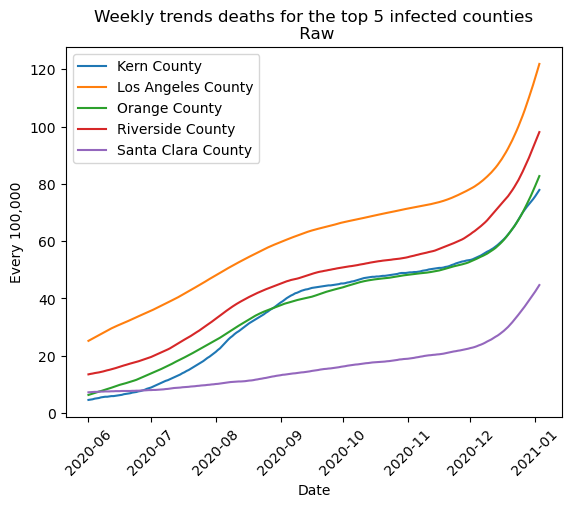

In [186]:
df_deaths = pd.read_csv('data/covid_deaths_usafacts.csv')

def get_pop_county(county_name):
    return df_pop[df_pop['County Name']==county_name].iloc[:,3].values[0]

def add_county_to_plot(*counties):
    for county in counties:
        county_name = df_pop[df_pop['countyFIPS']==county].iloc[0,1]
        sr = trim_dates(df_deaths.loc[df_deaths['countyFIPS']==county,:]).sum()
        sr_mean = np.round(sr.rolling(window=7).mean())
        sr_mean.drop(sr_mean.index[0:7], inplace=True)
        x = sr_mean.index.values
        x = np.asarray(x, dtype='datetime64[s]')
        y = sr_mean.values / get_pop_county(county_name) * 100000
        plt.plot(x, y, label = county_name)
add_county_to_plot(6029,6037,6059,6065,6085)
plt.title("Weekly trends deaths for the top 5 infected counties\n Raw")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Every 100,000")
plt.legend()
plt.show()

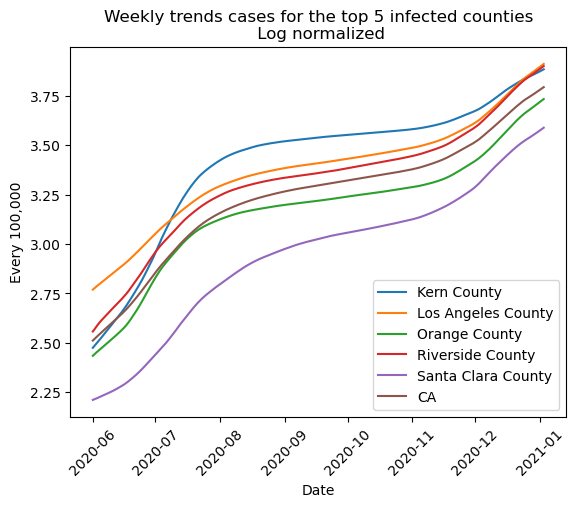

In [187]:
df_confirmed = pd.read_csv('data/covid_confirmed_usafacts.csv')

def get_pop_county(county_name):
    return df_pop[df_pop['County Name']==county_name].iloc[:,3].values[0]

def add_county_to_plot(*counties):
    for county in counties:
        county_name = df_pop[df_pop['countyFIPS']==county].iloc[0,1]
        sr = trim_dates(df_confirmed.loc[df_confirmed['countyFIPS']==county,:]).sum()
        sr_mean = np.round(sr.rolling(window=7).mean())
        sr_mean.drop(sr_mean.index[0:7], inplace=True)
        x = sr_mean.index.values
        x = np.asarray(x, dtype='datetime64[s]')
        y = np.log10(sr_mean.values / get_pop_county(county_name) * 100000)
        plt.plot(x, y, label = county_name)
add_county_to_plot(6029,6037,6059,6065,6085)
add_state_to_plot('CA')
plt.title("Weekly trends cases for the top 5 infected counties\n Log normalized")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Every 100,000")
plt.legend()
plt.show()

From the plot I can identify two periods of sharp rises in case, one being first week of July and the other is middle of December. It may be possible to attribute the first rise to high heat in Summer and increased outdoor activities. The second rise in December may be attributed to increased travel during holiday season. And lastly, yes the counties somewhat follows state pattern with the exception of Kern County.